<a href="https://colab.research.google.com/github/kostadubovskiy/stock-price-predictor/blob/main/stock-price-predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#  to predict the closng stock price of a corporation(Apple Inc.) using the past 60 day stock price.

In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
# df short for data frame
df = web.DataReader('AAPl', data_source='yahoo', start='2012-01-01', end='2021-02-14') # data frame
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004
2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995
2021-02-10,136.990005,134.399994,136.479996,135.389999,73046600.0,135.389999


In [ ]:
# Get the number of rows & columns in the data set
df.shape

(2294, 6)

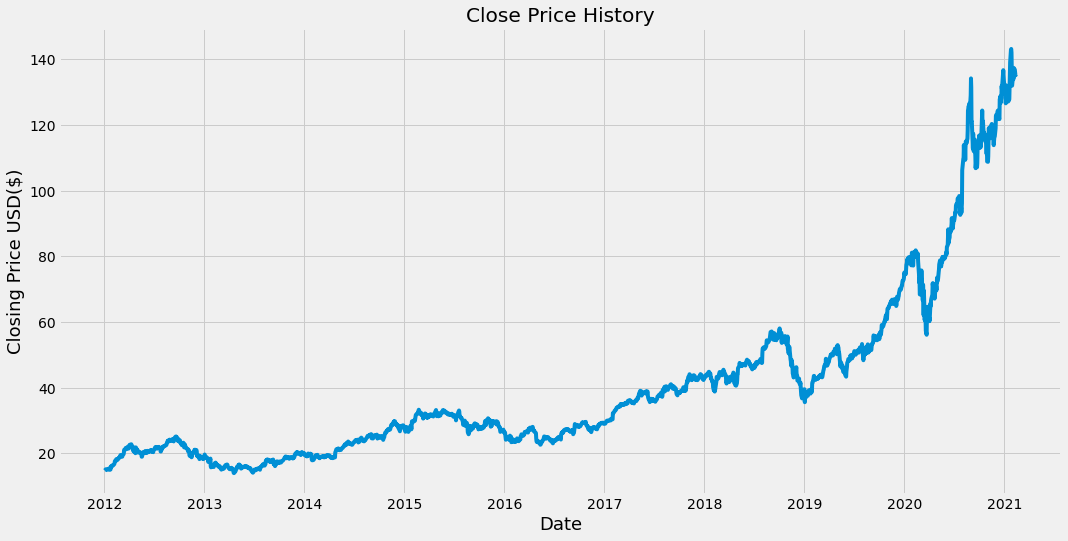

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the datafram to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8) # use about 80% of data for trainng set

training_data_len

1836

In [ ]:
# Scale the data — almost always advantageous to preprocess data(scaling, normalization, etc)
scaler = MinMaxScaler(feature_range=(0,1)) # sets data to values b/w 0 and 1(inclusive)
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.93986647],
       [0.93785432],
       [0.93971165]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train & y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
  

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]
[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.008

In [ ]:
# Convert the x_tran & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1776, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) # epoch is the number of iteratons when your entire data set is passed through forward and backward through a neural network


1776/1776 [==============================] - 40s 21ms/step - loss: 7.9345e-04


In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 1776 to 2294
test_data = scaled_data[training_data_len - 60 : 2294, :]
# Create the data sets x_test & y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test) # converting it to a numpy array so that we can use it in a LSTM model

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predcted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # sort of unscaling the values
# now we want our predictons set to contain the same values as our y_test set

In [ ]:
# Get the root mean squared error (RMSE) — standard deviaton of the residuals
# Usually want to use other evaluation metrics too
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8.100960843948297

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


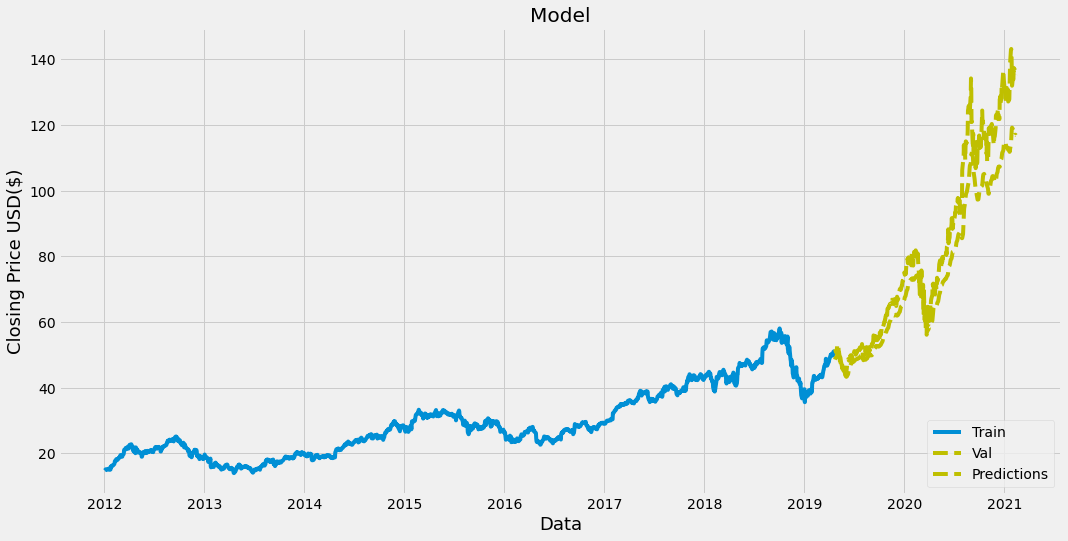

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-04-23,51.869999,49.538715
2019-04-24,51.790001,49.807487
2019-04-25,51.320000,50.067017
2019-04-26,51.075001,50.242966
2019-04-29,51.152500,50.333302
...,...,...
2021-02-08,136.910004,124.386414
2021-02-09,136.009995,124.474297
2021-02-10,135.389999,124.490143


In [ ]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-02-10')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values & convert the datafram to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[124.41001]]


In [ ]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-02-10', end='2021-02-10')
print(apple_quote2['Close'])

Date
2021-02-10    135.389999
Name: Close, dtype: float64
